In [54]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [55]:
data = pd.read_csv("winequality .csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()
data.isnull()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

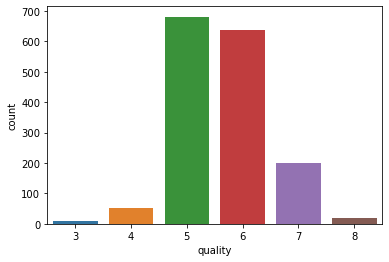

In [7]:
sns.countplot(x='quality',data=data)

<AxesSubplot:>

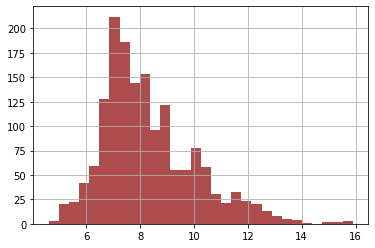

In [8]:
data['fixed acidity'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:>

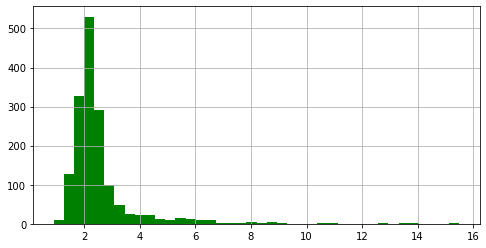

In [9]:
data['residual sugar'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:>

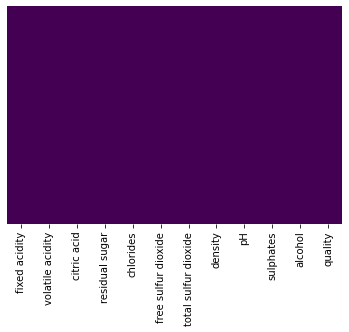

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

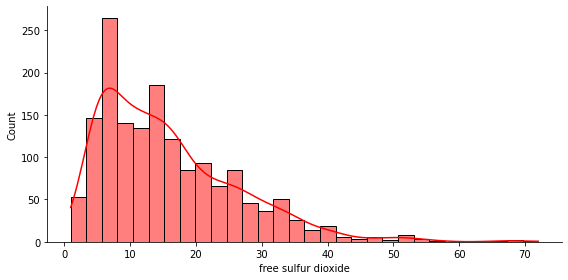

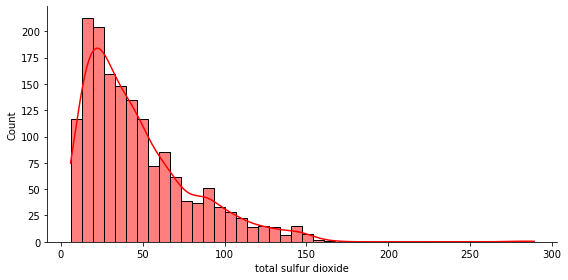

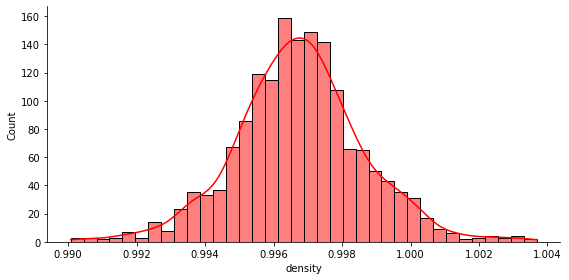

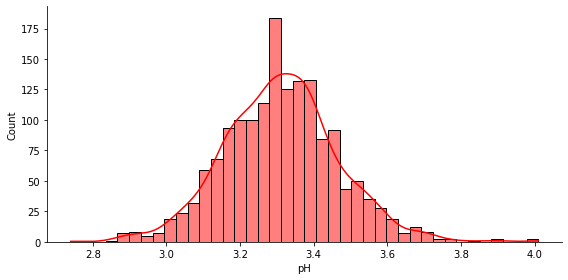

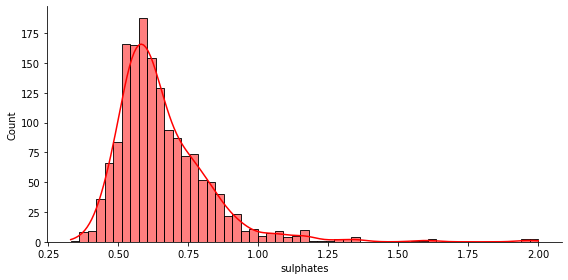

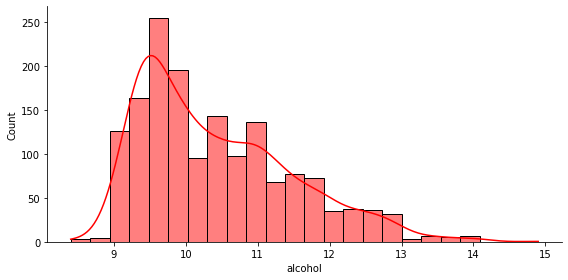

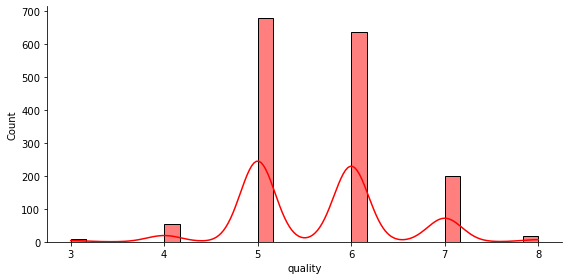

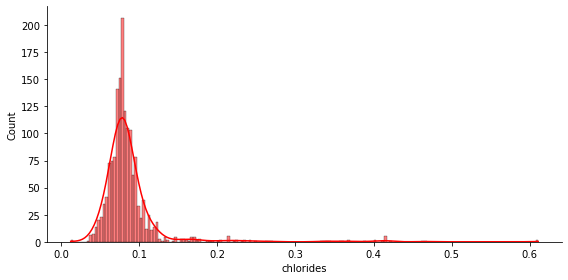

In [28]:
#to check the normal distribution of the data

sns.displot(data, x = 'free sulfur dioxide', kde=True, height=4, aspect=2, color="red")
sns.displot(data, x = 'total sulfur dioxide', kde=True, height=4, aspect=2,color="red")
sns.displot(data, x = 'density', kde=True, height=4, aspect=2,color="red")
sns.displot(data, x = 'pH', kde=True, height=4, aspect=2,color="red")
sns.displot(data, x = 'sulphates', kde=True, height=4, aspect=2,color="red")
sns.displot(data, x = 'alcohol', kde=True, height=4, aspect=2,color="red")
sns.displot(data, x = 'quality', kde=True, height=4, aspect=2,color="red")
sns.displot(data, x = 'chlorides', kde=True, height=4, aspect=2,color="red")

<AxesSubplot:>

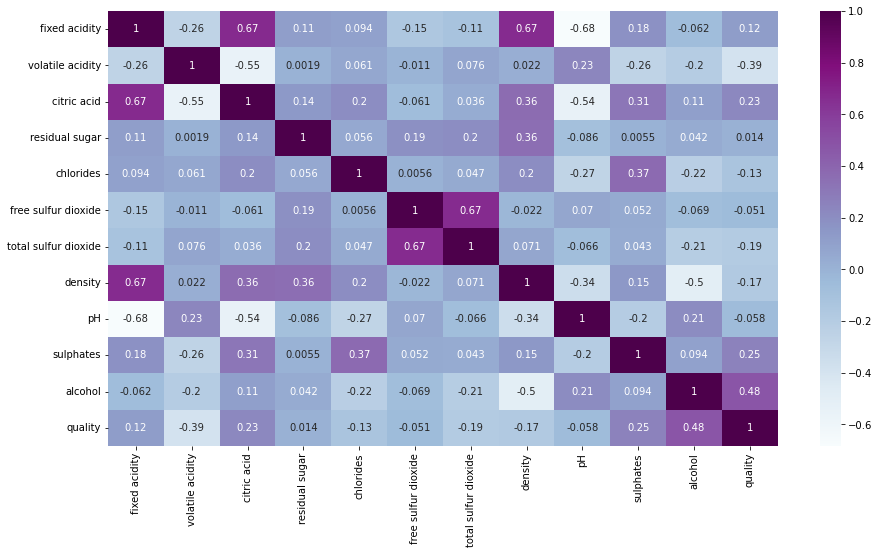

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="BuPu")

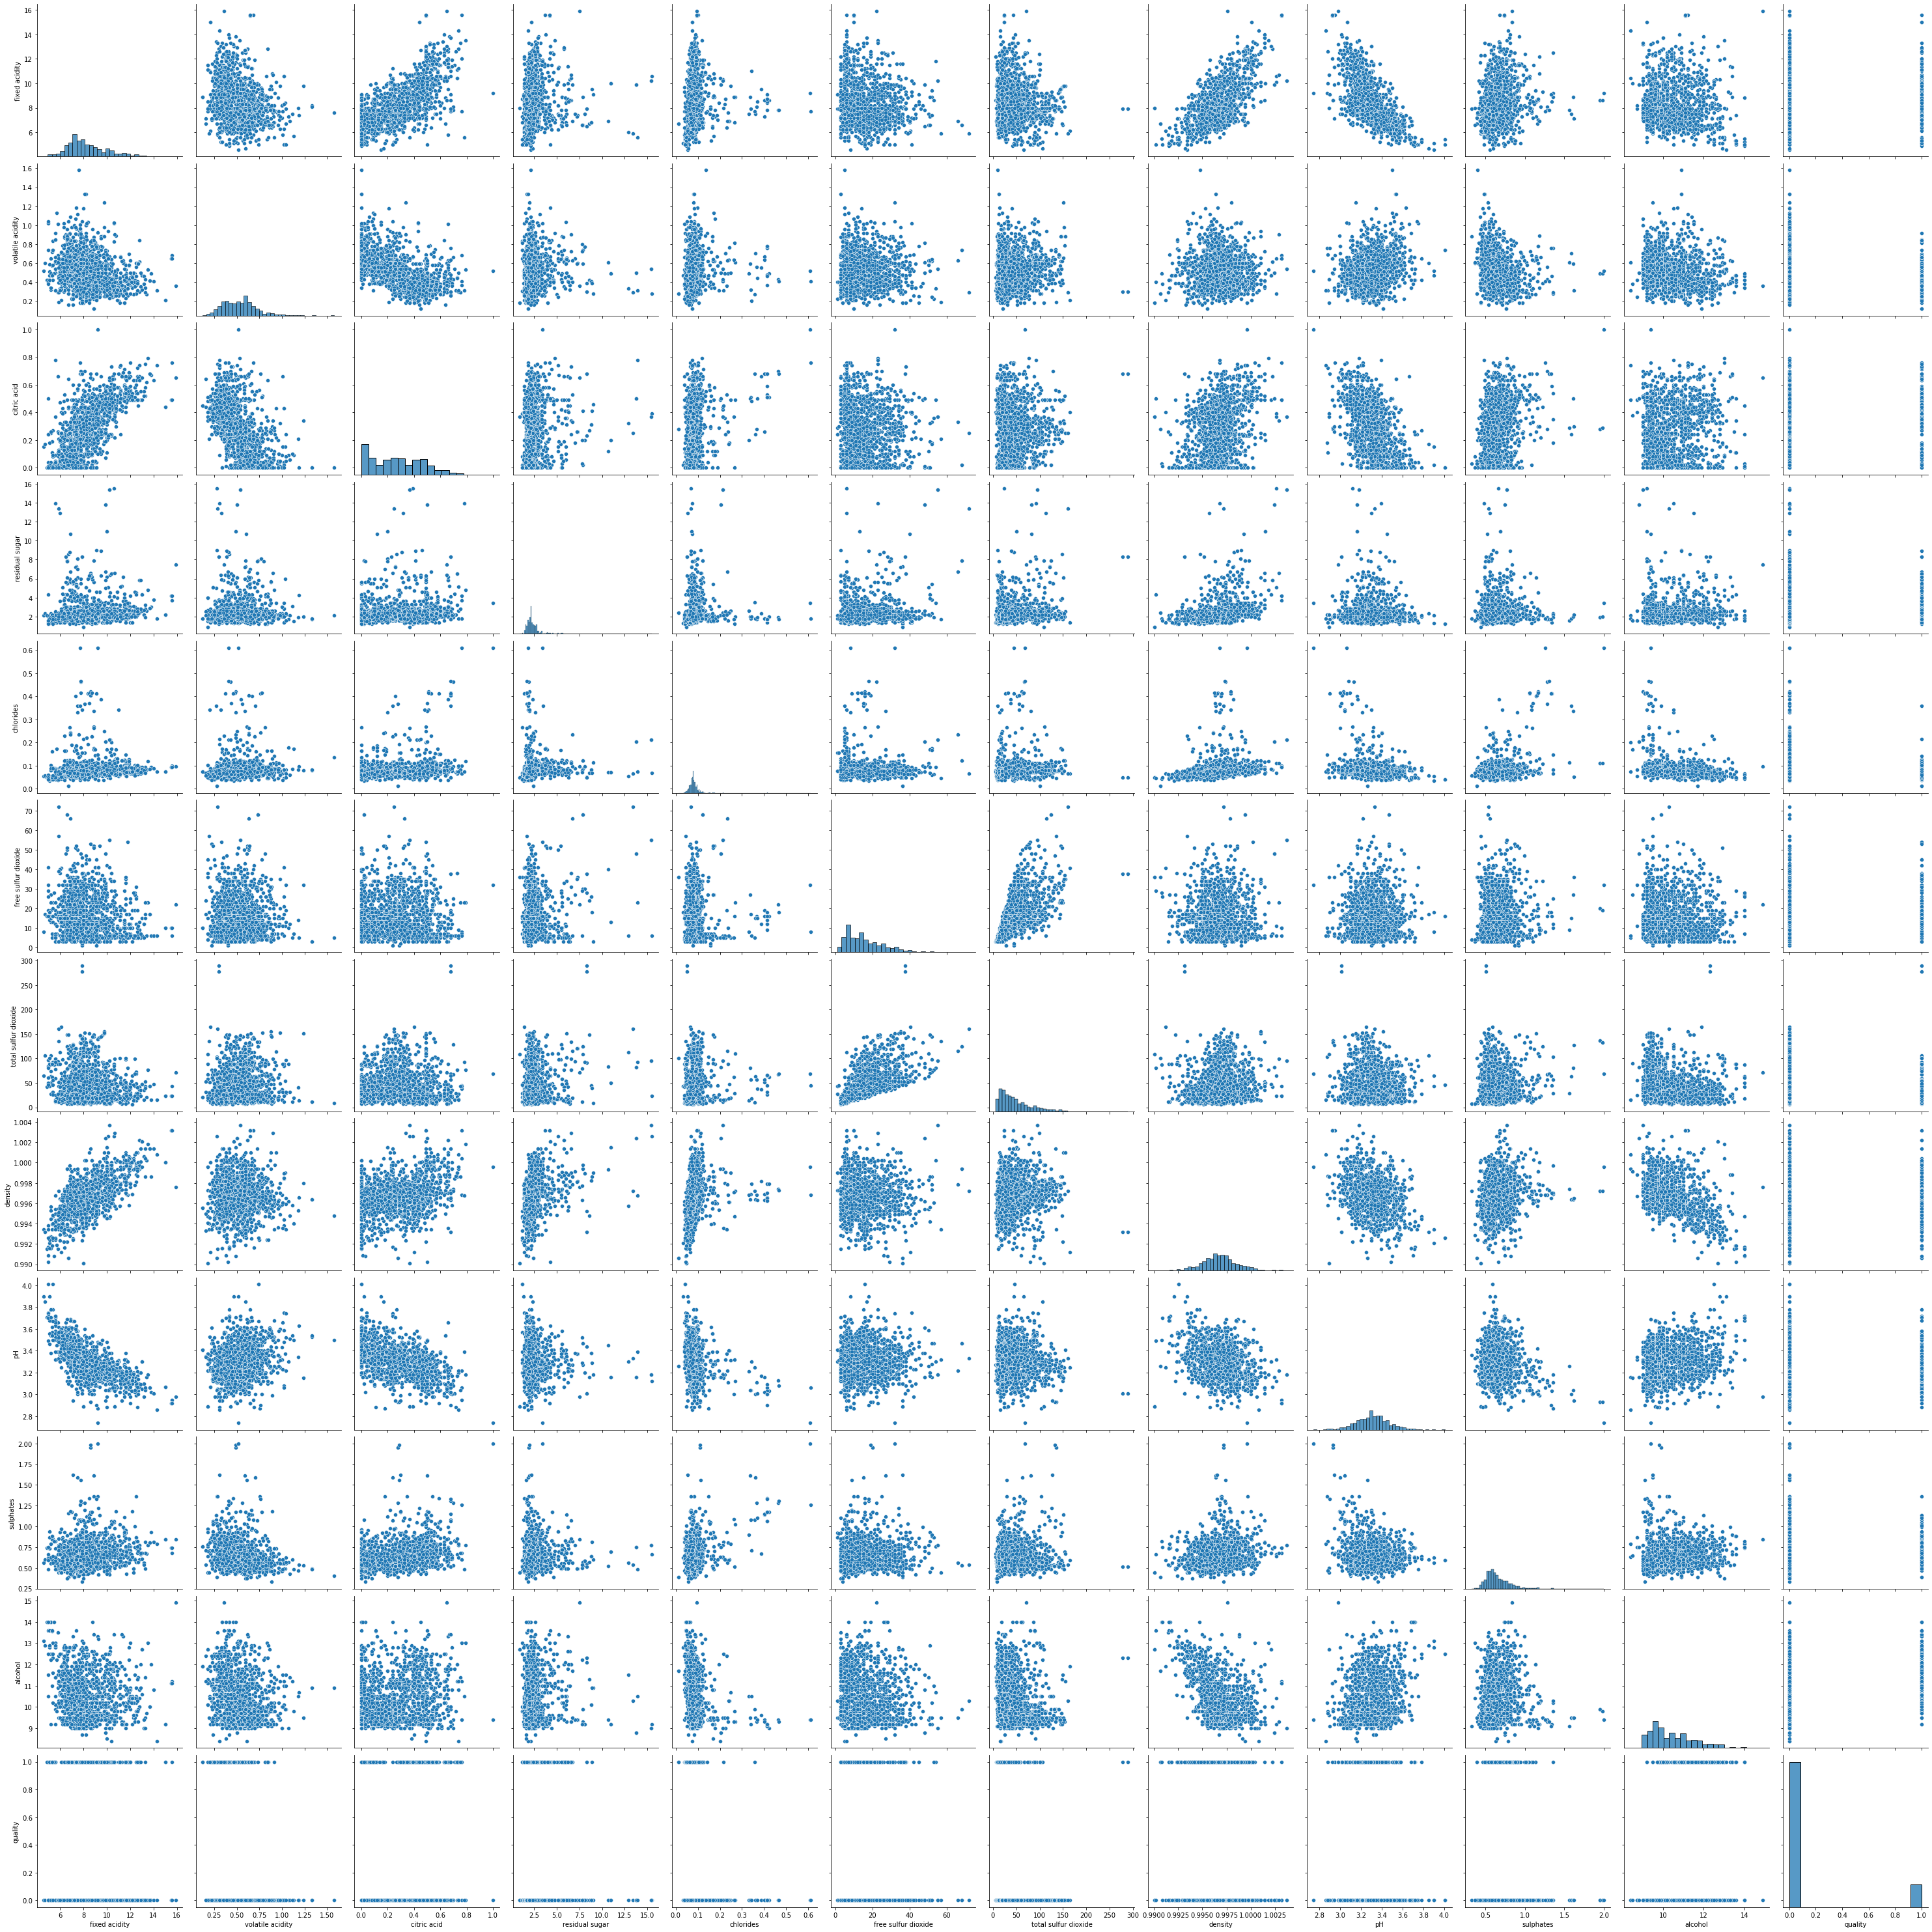

In [53]:
sns.pairplot(data, height=3.5);
plt.show()

In [56]:
data['quality']=[1 if x>=7 else 0 for x in data['quality']]
X=data.drop('quality',axis=1)
Y=data['quality']

In [30]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [111]:
logisticmodel = LogisticRegression(solver='liblinear', random_state=0)

In [112]:
logisticmodel.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [113]:
y_pred = logisticmodel.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       290
           1       0.57      0.40      0.47        30

    accuracy                           0.92       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.91      0.92      0.91       320



In [107]:
from sklearn import  metrics
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[281   9]
 [ 18  12]]


In [108]:
confusionmatrix = confusion_matrix(y_test, y_pred)

In [109]:
logitmodel.score(X_test, y_test)

0.915625

Text(33.0, 0.5, 'actual')

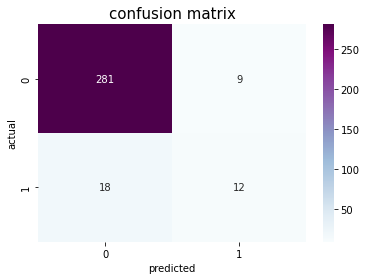

In [110]:
ax=sns.heatmap(confusionmatrix, annot=True, cmap="BuPu",fmt="d")

plt.title('confusion matrix', fontsize= 15)
plt.xlabel('predicted',fontsize=10)
plt.ylabel('actual',fontsize=10)